# Zadanie 3

### Część podstawowa

In [173]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import ipywidgets as widgets
import csv

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.display import display, Math, Latex, Javascript

In [174]:
def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\\\ "
    ltx += r'\end{array}\right]'
    return ltx

def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

def h(theta, x):
    """Funkcja hipotezy"""
    return theta[0] + theta[1] * x

def gradient_descent(h, cost_fun, theta, x, y, alpha, eps, iterations=None):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]
    m = len(y)
    while iterations > 0 if iterations else True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta
        try:
            current_cost, prev_cost = cost_fun(h, theta, x, y), current_cost
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        log.append([current_cost, theta])
        if iterations: iterations -= iterations
    return theta, log

In [175]:
x, y = list(), list()
with open("fires_thefts.csv") as data:
    reader = csv.reader(data, delimiter=',')
    for xi, yi in reader:
        x.append(float(xi))
        y.append(float(yi))

In [176]:
best_theta, log = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.001, eps=0.0001)
# parametr θ krzywej regresyjnej
display(Math(r'\large\textrm{Wynik:}\quad \theta = ' +
            LatexMatrix(np.matrix(best_theta).reshape(2, 1)) +
            (r' \quad J(\theta) = %.4f' % log[-1][0]) +
            r' \quad \textrm{po %d iteracjach}' % len(log)))
# Liczba włamań na 1000 gospodarstw domowych
for x in [50,100,200]:
    print(f"Przewidywana liczba włamań przy {x} pożarach na 1000 gospodarstw domowych: {h(best_theta, x)}") 

<IPython.core.display.Math object>

Przewidywana liczba włamań przy 50 pożarach na 1000 gospodarstw domowych: 83.99720984316122
Przewidywana liczba włamań przy 100 pożarach na 1000 gospodarstw domowych: 151.87460180621042
Przewidywana liczba włamań przy 200 pożarach na 1000 gospodarstw domowych: 287.6293857323089


### Część zaawansowana 

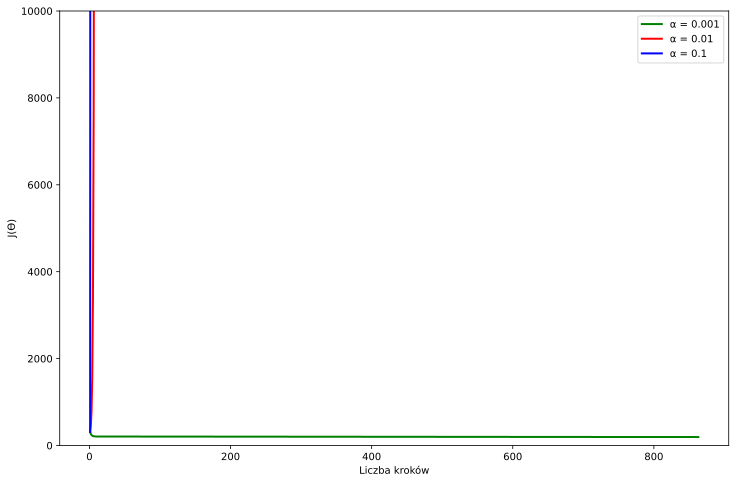

<function __main__.slide(steps)>

In [426]:
ALPHAS = [0.001, 0.01, 0.1]

x, y = list(), list()
with open("fires_thefts.csv") as data:
    reader = csv.reader(data, delimiter=',')
    for xi, yi in reader:
        x.append(float(xi))
        y.append(float(yi))

alphas_gradient = {}
for a in ALPHAS:
    best_theta, log = gradient_descent(h, J, [5.0, 1.0], x, y, alpha=a, eps=0.01, iterations=200)
    alphas_gradient[a] = [best_theta, log]
    
slider = widgets.FloatSlider(min=10**3, max=10**4, step=200, value=10**5, description='kroki', width=300)

def slide(steps):    
    fig = pl.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Liczba kroków')
    ax.set_ylabel('J(\u03F4)')
    colors = ['blue','red','green']
    for a in ALPHAS:
        best_theta, log = alphas_gradient[a]
        x = np.arange(1, len(log) + 1)
        y = [log[i][0] for i in range(len(log))]
        ax.plot(x, y, color=colors.pop(), lw=2, label=f'\u03B1 = {a}')
        ax.legend()
        axes = pl.gca()
        axes.set_ylim([0, steps])

widgets.interact(slide, steps=slider)